In [350]:
#importing necessary packages
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np
import psython as psy
import pingouin as pg
from scipy.stats import contingency 
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import pearsonr

In [351]:
#importing csv
data = "group21_alltogether.csv"

df = pd.read_csv(data)

In [352]:
#printing the first 5 rows
df.head()

,userid,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,condition,prolific,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge
0,485,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 16:57:47,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
1,488,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,0,http://localhost/group11/,2024-06-14 17:04:36,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
2,489,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 17:17:38,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
3,492,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 17:19:24,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
4,497,3,2,2,2,NaN,NaN,NaN,NaN,NaN,...,0,1.5,2024-06-15 20:56:12,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data


In [353]:
#printing number of rows and columns
df.shape

(136, 57)

In [354]:
#printing column names
df.columns

Index(['userid', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'age', 'gender', 'device', 'education', 'time', 'condition',
       'prolific', 'timestart', 'genre', 'consent', 'mancheck1', 'mancheck2',
       'calibrationid', 'recommendationid', '_merge'],
      dtype='object')

In [355]:
#printing data types
df.dtypes

userid                int64
Q2                    int64
Q3                    int64
Q4                    int64
Q5                    int64
Q6                  float64
Q7                  float64
Q8                  float64
Q9                  float64
Q10                 float64
Q11                 float64
Q12                 float64
Q13                 float64
Q14                 float64
Q15                 float64
Q16                 float64
Q17                 float64
Q18                 float64
Q19                 float64
Q20                 float64
Q21                 float64
Q22                 float64
Q23                 float64
Q24                 float64
Q25                 float64
Q26                 float64
Q27                 float64
Q28                 float64
Q29                 float64
Q30                 float64
Q31                 float64
Q32                 float64
Q33                 float64
Q34                 float64
Q35                 float64
Q36                 

## Dropping the users that answered before 2024-06-21 14:00

In [356]:
#first checking the column
df["timestart"].describe()

count                     136
unique                    136
top       2024-06-14 16:57:47
freq                        1
Name: timestart, dtype: object

In [357]:
df

,userid,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,condition,prolific,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge
0,485,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 16:57:47,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
1,488,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,0,http://localhost/group11/,2024-06-14 17:04:36,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
2,489,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 17:17:38,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
3,492,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 17:19:24,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
4,497,3,2,2,2,NaN,NaN,NaN,NaN,NaN,...,0,1.5,2024-06-15 20:56:12,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,716,1,1,1,1,1.0,1.0,1.0,1.0,1.0,...,1,https://recipe-study.wur.nl/group21_bookrecomm...,2024-06-22 21:18:03,1.0,1.0,1.0,1.0,305.0,543.0,both in master and using data
132,721,4,7,5,5,5.0,5.0,5.0,5.0,3.0,...,1,https://recipe-study.wur.nl/group21_bookrecomm...,2024-06-23 01:38:36,4.0,1.0,0.0,5.0,1914.0,414.0,both in master and using data
133,722,6,5,5,4,4.0,6.0,6.0,6.0,6.0,...,0,https://recipe-study.wur.nl/group21_bookrecomm...,2024-06-23 15:17:58,2.0,1.0,0.0,2.0,929.0,2262.0,both in master and using data
134,723,7,7,7,6,6.0,6.0,5.0,5.0,4.0,...,0,https://recipe-study.wur.nl/group21_bookrecomm...,2024-06-23 16:17:09,1.0,1.0,1.0,6.0,151.0,132.0,both in master and using data


In [358]:
df["timestart"].max()

'2024-06-23 23:47:10'

In [359]:
df["timestart"].min()

'2024-06-14 16:57:47'

In [360]:
#Convert the date
df['timestart'] = pd.to_datetime(df['timestart'])

In [361]:
df['timestart']

0     2024-06-14 16:57:47
1     2024-06-14 17:04:36
2     2024-06-14 17:17:38
3     2024-06-14 17:19:24
4     2024-06-15 20:56:12
              ...        
131   2024-06-22 21:18:03
132   2024-06-23 01:38:36
133   2024-06-23 15:17:58
134   2024-06-23 16:17:09
135   2024-06-23 23:47:10
Name: timestart, Length: 136, dtype: datetime64[ns]

In [362]:
 # Filter data between two dates -> used this https://www.geeksforgeeks.org/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/
filtered_df = df.loc[(df['timestart'] >= '2024-06-21 14:00')
                     & (df['timestart'] <= '2024-06-23 23:47:10')]

In [363]:
filtered_df.head()

,userid,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,condition,prolific,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge
50,599,4,2,2,2,2.0,2.0,4.0,2.0,2.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:06:27,3.0,1.0,0.0,2.0,683.0,2017.0,both in master and using data
51,600,7,7,7,7,7.0,7.0,5.0,5.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:29:48,1.0,1.0,0.0,4.0,769.0,1841.0,both in master and using data
52,601,4,4,4,4,4.0,4.0,7.0,7.0,7.0,...,0,https://recipe-study.wur.nl/gr,2024-06-21 14:33:58,1.0,1.0,1.0,4.0,305.0,304.0,both in master and using data
53,602,6,7,6,5,5.0,7.0,7.0,4.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:35:16,1.0,1.0,1.0,4.0,417.0,418.0,both in master and using data
54,603,6,7,7,7,6.0,7.0,6.0,7.0,7.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:39:19,1.0,1.0,1.0,3.0,1277.0,1276.0,both in master and using data


In [364]:
print(f'Original df was {df.shape}')
print(f'Filtered df is {filtered_df.shape}')

Original df was (136, 57)
Filtered df is (86, 57)


In [365]:
print(f'Removed {len(df)-len(filtered_df)} values from the original DF')

Removed 50 values from the original DF


## Removing Data based on Prolific

In [366]:
#aiming to see which data could be potentially testing
filtered_df['prolific'].value_counts()

prolific
https://recipe-study.wur.nl/gr                          76
https://recipe-study.wur.nl/group21_bookrecommender/     6
fbclid=PAZXh0bgNhZW0CMTEAAab6i                           1
fbclid=PAZXh0bgNhZW0CMTEAAabVk                           1
fbclid=PAZXh0bgNhZW0CMTEAAaZaA                           1
fbclid=PAZXh0bgNhZW0CMTEAAaY85                           1
Name: count, dtype: int64

In [367]:
#identifying the values to keep
values_to_keep = ['https://recipe-study.wur.nl/gr']

#filtering based on values to keep
filtered_df2 = filtered_df[filtered_df['prolific'].isin(values_to_keep)]

In [368]:
#checking if it worked
filtered_df2['prolific'].value_counts()

prolific
https://recipe-study.wur.nl/gr    76
Name: count, dtype: int64

In [369]:
filtered_df2.shape

(76, 57)

In [370]:
print(f'Original df was {filtered_df.shape}')
print(f'Filtered df is {filtered_df2.shape}')

Original df was (86, 57)
Filtered df is (76, 57)


## Dropping Nan Results

In [371]:
filtered_df3=filtered_df2.dropna()

In [372]:
filtered_df3.head()

,userid,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,condition,prolific,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge
50,599,4,2,2,2,2.0,2.0,4.0,2.0,2.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:06:27,3.0,1.0,0.0,2.0,683.0,2017.0,both in master and using data
51,600,7,7,7,7,7.0,7.0,5.0,5.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:29:48,1.0,1.0,0.0,4.0,769.0,1841.0,both in master and using data
52,601,4,4,4,4,4.0,4.0,7.0,7.0,7.0,...,0,https://recipe-study.wur.nl/gr,2024-06-21 14:33:58,1.0,1.0,1.0,4.0,305.0,304.0,both in master and using data
53,602,6,7,6,5,5.0,7.0,7.0,4.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:35:16,1.0,1.0,1.0,4.0,417.0,418.0,both in master and using data
54,603,6,7,7,7,6.0,7.0,6.0,7.0,7.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:39:19,1.0,1.0,1.0,3.0,1277.0,1276.0,both in master and using data


In [373]:
filtered_df3.shape

(66, 57)

In [374]:
print(f'Original df was {filtered_df2.shape}')
print(f'Filtered df is {filtered_df3.shape}')

Original df was (76, 57)
Filtered df is (66, 57)


## Renaming Columns

In [375]:
filtered_df3.rename(columns={'Q2': 'satisfaction_1', 'Q3': 'satisfaction_2', 'Q4': 'satisfaction_3', 'Q5': 'satisfaction_4', 'Q6': 'satisfaction_5', 'Q7': 'satisfaction_6'}, inplace=True)

C:\Users\vendi\AppData\Local\Temp\ipykernel_21488\2120619129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q2': 'satisfaction_1', 'Q3': 'satisfaction_2', 'Q4': 'satisfaction_3', 'Q5': 'satisfaction_4', 'Q6': 'satisfaction_5', 'Q7': 'satisfaction_6'}, inplace=True)


In [376]:
filtered_df3.rename(columns={'Q8': 'credibility_1', 'Q9': 'credibility_2', 'Q10': 'credibility_3', 'Q11': 'credibility_4', 'Q12': 'credibility_5', 'Q13': 'credibility_6', 'Q14': 'credibility_7', 'Q15': 'credibility_8', 'Q16': 'credibility_9', 'Q17': 'credibility_10', 'Q18': 'credibility_11', 'Q19': 'credibility_12'}, inplace=True)

C:\Users\vendi\AppData\Local\Temp\ipykernel_21488\1841839145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q8': 'credibility_1', 'Q9': 'credibility_2', 'Q10': 'credibility_3', 'Q11': 'credibility_4', 'Q12': 'credibility_5', 'Q13': 'credibility_6', 'Q14': 'credibility_7', 'Q15': 'credibility_8', 'Q16': 'credibility_9', 'Q17': 'credibility_10', 'Q18': 'credibility_11', 'Q19': 'credibility_12'}, inplace=True)


In [377]:
filtered_df3.rename(columns={'Q20': 'motivation_1', 'Q21': 'motivation_2', 'Q22': 'motivation_3', 'Q23': 'motivation_4', 'Q24': 'motivation_5', 'Q25': 'motivation_6', 'Q26': 'motivation_7', 'Q27': 'motivation_8', 'Q28': 'motivation_9', 'Q29': 'motivation_10', 'Q30': 'motivation_11', 'Q31': 'motivation_12'}, inplace=True)

C:\Users\vendi\AppData\Local\Temp\ipykernel_21488\4024581968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q20': 'motivation_1', 'Q21': 'motivation_2', 'Q22': 'motivation_3', 'Q23': 'motivation_4', 'Q24': 'motivation_5', 'Q25': 'motivation_6', 'Q26': 'motivation_7', 'Q27': 'motivation_8', 'Q28': 'motivation_9', 'Q29': 'motivation_10', 'Q30': 'motivation_11', 'Q31': 'motivation_12'}, inplace=True)


In [378]:
filtered_df3.rename(columns={'Q32': 'anthropomorphism_1', 'Q33': 'anthropomorphism_2', 'Q34': 'anthropomorphism_3', 'Q35': 'anthropomorphism_4'}, inplace=True)

C:\Users\vendi\AppData\Local\Temp\ipykernel_21488\2626641718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q32': 'anthropomorphism_1', 'Q33': 'anthropomorphism_2', 'Q34': 'anthropomorphism_3', 'Q35': 'anthropomorphism_4'}, inplace=True)


In [379]:
filtered_df3.rename(columns={'Q36': 'control(reading_habits)', 'Q37': 'control(previous_experience_with_RS)'}, inplace=True)

C:\Users\vendi\AppData\Local\Temp\ipykernel_21488\1940005018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q36': 'control(reading_habits)', 'Q37': 'control(previous_experience_with_RS)'}, inplace=True)


In [380]:
filtered_df3.rename(columns={'Q38': 'conscientiousness_1', 'Q39': 'conscientiousness_2', 'Q40': 'conscientiousness_3', 'Q41': 'conscientiousness_4', 'Q42': 'conscientiousness_5'}, inplace=True)

C:\Users\vendi\AppData\Local\Temp\ipykernel_21488\3687310035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q38': 'conscientiousness_1', 'Q39': 'conscientiousness_2', 'Q40': 'conscientiousness_3', 'Q41': 'conscientiousness_4', 'Q42': 'conscientiousness_5'}, inplace=True)


In [381]:
filtered_df3.columns

Index(['userid', 'satisfaction_1', 'satisfaction_2', 'satisfaction_3',
       'satisfaction_4', 'satisfaction_5', 'satisfaction_6', 'credibility_1',
       'credibility_2', 'credibility_3', 'credibility_4', 'credibility_5',
       'credibility_6', 'credibility_7', 'credibility_8', 'credibility_9',
       'credibility_10', 'credibility_11', 'credibility_12', 'motivation_1',
       'motivation_2', 'motivation_3', 'motivation_4', 'motivation_5',
       'motivation_6', 'motivation_7', 'motivation_8', 'motivation_9',
       'motivation_10', 'motivation_11', 'motivation_12', 'anthropomorphism_1',
       'anthropomorphism_2', 'anthropomorphism_3', 'anthropomorphism_4',
       'control(reading_habits)', 'control(previous_experience_with_RS)',
       'conscientiousness_1', 'conscientiousness_2', 'conscientiousness_3',
       'conscientiousness_4', 'conscientiousness_5', 'age', 'gender', 'device',
       'education', 'time', 'condition', 'prolific', 'timestart', 'genre',
       'consent', 'manch

## Saving CSV

In [382]:
filtered_df3.to_csv("results.csv", index = False)

## Removing those who did not consent and are under 18

In [383]:
data = "results.csv"

df = pd.read_csv(data)

In [384]:
df['age'].describe()

count    66.000000
mean     29.742424
std      17.133243
min      18.000000
25%      20.000000
50%      21.000000
75%      26.750000
max      74.000000
Name: age, dtype: float64

In [385]:
df['consent'].describe()

count    66.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: consent, dtype: float64

In [386]:
#keeping users who consent and are over 18
df = df[(df["consent"] == 1) & (df["age"] >= 18)]

In [387]:
#checking if it worked
df['consent'].value_counts()

consent
1.0    66
Name: count, dtype: int64

In [388]:
#checking if it worked
df['age'].describe()

count    66.000000
mean     29.742424
std      17.133243
min      18.000000
25%      20.000000
50%      21.000000
75%      26.750000
max      74.000000
Name: age, dtype: float64

# Removing -1 Results

In [389]:
df['mancheck1'].value_counts()

mancheck1
 1.0    46
 0.0    19
-1.0     1
Name: count, dtype: int64

In [390]:
#removing the -1 result in the mancheck1
df = df[df['mancheck1'] != -1]

In [391]:
#saving those that consented, and are above 18 to a csv
df.to_csv("filtered.csv", index = False)

## Exploring Demographics

In [392]:
df['age'].describe()

count    65.000000
mean     29.200000
std      16.685697
min      18.000000
25%      20.000000
50%      21.000000
75%      23.000000
max      74.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

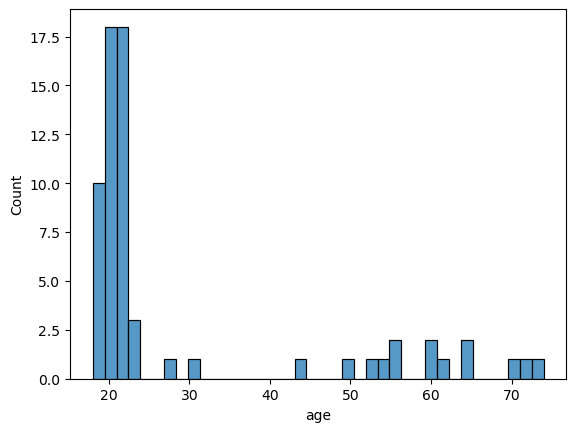

In [393]:
sns.histplot(x = 'age', data = df)

In [394]:
df['gender'].value_counts(sort=False)

gender
2.0    17
1.0    48
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

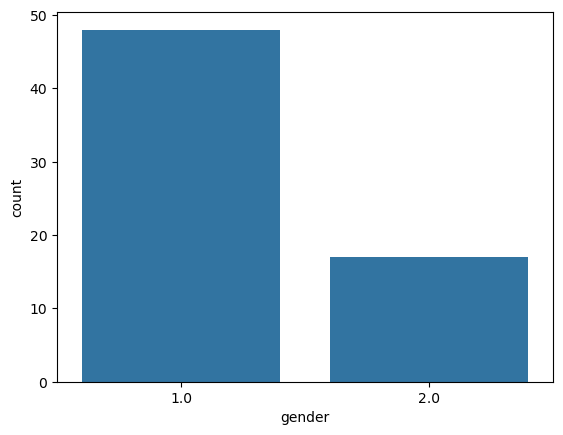

In [395]:
sns.countplot(x='gender', data=df)

In [396]:
df['education'].value_counts()

education
2.0    40
4.0    14
5.0     9
3.0     1
1.0     1
Name: count, dtype: int64

<Axes: xlabel='education', ylabel='count'>

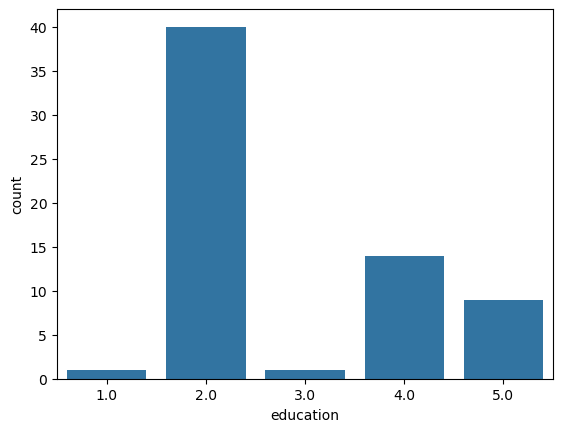

In [397]:
sns.countplot(x='education', data=df)

# Randomization Check

## Gender

In [398]:
#crosstab
mycrosstab = pd.crosstab(df['gender'], df['condition'])
mycrosstab

condition,0,1
gender,,
1.0,15,33
2.0,8,9


In [399]:
#chi2 test for that table
c, p, dof, expected = contingency.chi2_contingency(mycrosstab)
print(f"𝜒²({dof:.0f}) = {c:.3f}, p = {p:.3f} ")

#Cramer's V
print(f"V = {contingency.association(mycrosstab,method='cramer'):.3f}")

𝜒²(1) = 0.768, p = 0.381 
V = 0.145


## Level of Education

In [400]:
#crosstab
mycrosstab = pd.crosstab(df['education'], df['condition'])
mycrosstab

condition,0,1
education,,
1.0,1,0
2.0,14,26
3.0,1,0
4.0,2,12
5.0,5,4


In [401]:
#chi2 test for that table
c, p, dof, expected = contingency.chi2_contingency(mycrosstab)
print(f"𝜒²({dof:.0f}) = {c:.3f}, p = {p:.3f} ")

#Cramer's V
print(f"V = {contingency.association(mycrosstab,method='cramer'):.3f}")

𝜒²(4) = 7.982, p = 0.092 
V = 0.350


## Age

In [402]:
(label1, values1), (label2, values2) = df.groupby('condition')['age']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")
testresult

We compare 0 (M=31.52, SD=18.443) with 1 (M=27.93, SD=15.277), t(38.389508004956426)=0.781, p=0.4395.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.781223,38.389508,two-sided,0.439463,"[-5.71, 12.9]",0.214815,0.34,0.128983


## Reading Habits

In [403]:
(label1, values1), (label2, values2) = df.groupby('condition')['control(reading_habits)']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=4.22, SD=1.768) with 1 (M=4.21, SD=1.641), t(42.192386366028295)=0.007, p=0.9946.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.006813,42.192386,two-sided,0.994596,"[-0.92, 0.92]",0.001812,0.263,0.050005


## Previous Experience with Recommender Systems

In [404]:
(label1, values1), (label2, values2) = df.groupby('condition')['control(previous_experience_with_RS)']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=3.65, SD=1.991) with 1 (M=3.57, SD=1.941), t(44.0148213756047)=0.155, p=0.8777.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.154768,44.014821,two-sided,0.877712,"[-0.97, 1.13]",0.040574,0.266,0.052723


# Manipulation Check

In [405]:
df['mancheck1'].value_counts()

mancheck1
1.0    46
0.0    19
Name: count, dtype: int64

In [406]:
df['mancheck2'].value_counts()

mancheck2
6.0    17
2.0    10
3.0    10
4.0     9
1.0     8
5.0     8
7.0     3
Name: count, dtype: int64

In [407]:
#crosstab
mycrosstab = pd.crosstab(df['condition'], df['mancheck2'])
mycrosstab

mancheck2,1.0,2.0,3.0,4.0,5.0,6.0,7.0
condition,,,,,,,
0,5,4,0,4,5,5,0
1,3,6,10,5,3,12,3


## Manipulation Check 1 (The recommender system took time to generate results)

In [408]:
(label1, values1), (label2, values2) = df.groupby('condition')['mancheck2']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=3.65, SD=1.902) with 1 (M=4.12, SD=1.815), t(43.21900774469187)=-0.944, p=0.3506.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.943544,43.219008,two-sided,0.350648,"[-1.46, 0.53]",0.248922,0.382,0.156906


## Manipulation Check 2 (A loading bar was present.)


In [409]:
#crosstab
mycrosstab = pd.crosstab(df['condition'], df['mancheck1'])
mycrosstab

mancheck1,0.0,1.0
condition,,
0,11,12
1,8,34


In [410]:
#chi2 test for that table
c, p, dof, expected = contingency.chi2_contingency(mycrosstab)
print(f"𝜒²({dof:.0f}) = {c:.3f}, p = {p:.3f} ")

#Cramer's V
print(f"V = {contingency.association(mycrosstab,method='cramer'):.3f}")

𝜒²(1) = 4.640, p = 0.031 
V = 0.303


# Factor Analysis for Perceived Anthropomorphism

In [411]:
items = df[['anthropomorphism_1','anthropomorphism_2', 'anthropomorphism_3', 'anthropomorphism_4']]

#CHECK ADEQUACY
#Bartlett
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(items)
print(chi_square_value, p_value)

#KMO
#Value should be 0.6<
kmo_all,kmo_model=calculate_kmo(items)
print(kmo_model)

129.417389212244 1.7048542602363122e-25
0.7342263289897041


In [412]:
# perform the factor analysis using the FactorAnalyzer class. You can specify the number of factors you want to extract using the n_factors parameter:
fa = FactorAnalyzer(n_factors = 1)

# fit the factor analysis model to your data
fa.fit(df[['anthropomorphism_1','anthropomorphism_2', 'anthropomorphism_3', 'anthropomorphism_4']])

C:\Users\vendi\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\factor_analyzer\factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


FactorAnalyzer(n_factors=1, rotation_kwargs={})

In [413]:
# Get the factor loadings
loadings = fa.loadings_

loadings

array([[-0.58806554],
       [-0.8675665 ],
       [-0.75794794],
       [-0.85275056]])

In [414]:
# Get the communalities
communalities = fa.get_communalities()

communalities

array([0.34582107, 0.75267163, 0.57448507, 0.72718352])

In [415]:
# Get the eigenvalues
#         Returns
#         -------
#         original_eigen_values : :obj:`numpy.ndarray`
#             The original eigenvalues
#         common_factor_eigen_values : :obj:`numpy.ndarray`
#             The common factor eigenvalues
eigenvalues = fa.get_eigenvalues()

np.round(eigenvalues, decimals = 2)

array([[ 2.77,  0.69,  0.37,  0.18],
       [ 2.4 ,  0.23, -0.08, -0.14]])

In [416]:
# Get the variance explained by each factor;  
#         Returns
#         -------
#         variance : :obj:`numpy.ndarray`
#             The factor variances.
#         proportional_variance : :obj:`numpy.ndarray`
#             The proportional factor variances.
#         cumulative_variances : :obj:`numpy.ndarray`
#             The cumulative factor variances.
variance_explained = fa.get_factor_variance()

variance_explained

(array([2.4001613]), array([0.60004033]), array([0.60004033]))

# Reliability for Perceived Anthropomorphism

In [417]:
# Calculate the initial Cronbach's alpha
pg.cronbach_alpha(items)

(0.8510307489414866, array([0.782, 0.902]))

In [418]:
# calculate the alpha value without each item
alpha_deleted_items = []
for item in items.columns:
    reduced_data = items.drop(item, axis=1)
    alpha = pg.cronbach_alpha(reduced_data)
    alpha_deleted_items.append((item, alpha))

for item, alpha in alpha_deleted_items:
    print("Item removed:", item)
    print("Cronbach's alpha:", alpha)
    print()

Item removed: anthropomorphism_1
Cronbach's alpha: (0.8642655019685037, array([0.795, 0.913]))

Item removed: anthropomorphism_2
Cronbach's alpha: (0.7782473252815155, array([0.665, 0.858]))

Item removed: anthropomorphism_3
Cronbach's alpha: (0.8052065263256598, array([0.706, 0.875]))

Item removed: anthropomorphism_4
Cronbach's alpha: (0.7830062218625116, array([0.672, 0.861]))



# Computing a new Variable for Perceived Anthropomorphism using item means

In [419]:
df['mediator'] = df[['anthropomorphism_1','anthropomorphism_2', 'anthropomorphism_3', 'anthropomorphism_4']].mean(axis=1) 

In [420]:
df['mediator'].describe()

count    65.000000
mean      3.788462
std       1.471228
min       1.000000
25%       2.750000
50%       4.000000
75%       4.750000
max       7.000000
Name: mediator, dtype: float64

# Group Comparison for Perceived Anthropomorphism (Mediator)

In [421]:
# descriptives of dv per group
df.groupby('condition')['mediator'].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
0,23.0,4.108696,1.605789,1.0,2.8750,4.25,5.0000,7.0
1,42.0,3.613095,1.380618,1.0,2.5625,4.00,4.4375,7.0


# Factor Analysis For Credibility

In [422]:
items2 = df[['credibility_1','credibility_2', 'credibility_3', 'credibility_4', 'credibility_5',
       'credibility_6', 'credibility_7', 'credibility_8', 'credibility_9',
       'credibility_10', 'credibility_11', 'credibility_12']]

#CHECK ADEQUACY
#Bartlett
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(items2)
print(chi_square_value, p_value)

#KMO
#Value should be 0.6<
kmo_all,kmo_model=calculate_kmo(items2)
print(kmo_model)

457.6307996037511 5.958850023433983e-60
0.8516223985150703


In [423]:
# perform the factor analysis using the FactorAnalyzer class. You can specify the number of factors you want to extract using the n_factors parameter:
fa = FactorAnalyzer(n_factors = 1)

# fit the factor analysis model to your data
fa.fit(df[['credibility_1','credibility_2', 'credibility_3', 'credibility_4', 'credibility_5',
       'credibility_6', 'credibility_7', 'credibility_8', 'credibility_9',
       'credibility_10', 'credibility_11', 'credibility_12']])

C:\Users\vendi\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\factor_analyzer\factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


FactorAnalyzer(n_factors=1, rotation_kwargs={})

In [424]:
# Get the factor loadings
loadings = fa.loadings_

loadings

array([[0.69217818],
       [0.70430745],
       [0.79112047],
       [0.79230974],
       [0.72408267],
       [0.67525128],
       [0.646226  ],
       [0.60971102],
       [0.69355113],
       [0.52760931],
       [0.65863861],
       [0.6676467 ]])

In [425]:
# Get the communalities
communalities = fa.get_communalities()

communalities

array([0.47911064, 0.49604898, 0.6258716 , 0.62775473, 0.52429571,
       0.4559643 , 0.41760804, 0.37174753, 0.48101317, 0.27837159,
       0.43380482, 0.44575211])

In [426]:
# Get the eigenvalues
#         Returns
#         -------
#         original_eigen_values : :obj:`numpy.ndarray`
#             The original eigenvalues
#         common_factor_eigen_values : :obj:`numpy.ndarray`
#             The common factor eigenvalues
eigenvalues = fa.get_eigenvalues()

np.round(eigenvalues, decimals = 2)

array([[ 6.15,  1.32,  0.96,  0.83,  0.69,  0.49,  0.4 ,  0.33,  0.29,
         0.22,  0.2 ,  0.12],
       [ 5.64,  0.73,  0.45,  0.32,  0.14, -0.03, -0.12, -0.21, -0.25,
        -0.3 , -0.35, -0.39]])

In [427]:
# Get the variance explained by each factor;  
#         Returns
#         -------
#         variance : :obj:`numpy.ndarray`
#             The factor variances.
#         proportional_variance : :obj:`numpy.ndarray`
#             The proportional factor variances.
#         cumulative_variances : :obj:`numpy.ndarray`
#             The cumulative factor variances.
variance_explained = fa.get_factor_variance()

variance_explained

(array([5.6373432]), array([0.4697786]), array([0.4697786]))

# Reliability for Credibility

In [428]:
# Calculate the initial Cronbach's alpha
pg.cronbach_alpha(items2)

(0.9112143649826259, array([0.876, 0.94 ]))

In [429]:
# calculate the alpha value without each item
alpha_deleted_items2 = []
for item in items2.columns:
    reduced_data = items2.drop(item, axis=1)
    alpha = pg.cronbach_alpha(reduced_data)
    alpha_deleted_items2.append((item, alpha))

for item, alpha in alpha_deleted_items2:
    print("Item removed:", item)
    print("Cronbach's alpha:", alpha)
    print()

Item removed: credibility_1
Cronbach's alpha: (0.9034695066927358, array([0.865, 0.935]))

Item removed: credibility_2
Cronbach's alpha: (0.9030013238794761, array([0.864, 0.935]))

Item removed: credibility_3
Cronbach's alpha: (0.9002803189575166, array([0.86 , 0.933]))

Item removed: credibility_4
Cronbach's alpha: (0.8999339506448587, array([0.86 , 0.932]))

Item removed: credibility_5
Cronbach's alpha: (0.9021658718907075, array([0.863, 0.934]))

Item removed: credibility_6
Cronbach's alpha: (0.9040615349674945, array([0.865, 0.935]))

Item removed: credibility_7
Cronbach's alpha: (0.9052430541469154, array([0.867, 0.936]))

Item removed: credibility_8
Cronbach's alpha: (0.9064850724655931, array([0.869, 0.937]))

Item removed: credibility_9
Cronbach's alpha: (0.9033994023717198, array([0.864, 0.935]))

Item removed: credibility_10
Cronbach's alpha: (0.9102010748702744, array([0.874, 0.939]))

Item removed: credibility_11
Cronbach's alpha: (0.9048473723570604, array([0.867, 0.936])

# Computing a the Variable Credibility by mean

In [430]:
df['dv'] = df[['credibility_1','credibility_2', 'credibility_3', 'credibility_4', 'credibility_5',
       'credibility_6', 'credibility_7', 'credibility_8', 'credibility_9',
       'credibility_10', 'credibility_11', 'credibility_12']].mean(axis=1)   

In [431]:
df['dv'].describe()

count    65.000000
mean      4.814103
std       1.118594
min       1.500000
25%       4.333333
50%       5.000000
75%       5.500000
max       7.000000
Name: dv, dtype: float64

# Group Comparison for Credibility

In [432]:
# descriptives of dv per group
df.groupby('condition')['dv'].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
0,23.0,4.981884,0.945469,3.0,4.500,5.0,5.458333,7.000000
1,42.0,4.722222,1.203775,1.5,4.375,5.0,5.562500,6.333333


<Axes: xlabel='condition', ylabel='dv'>

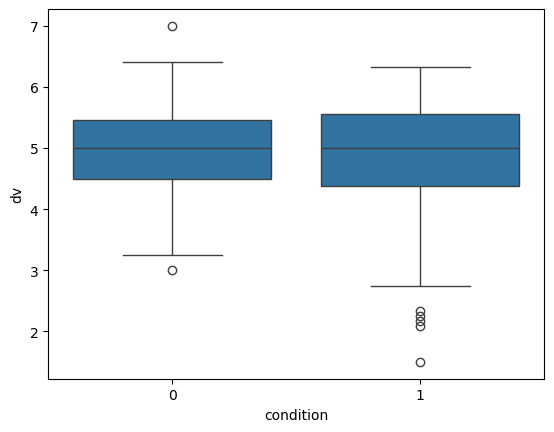

In [433]:
#visualization
sns.boxplot(y='dv', x='condition', data=df)

# Levene's Test for H1

In [434]:
from scipy.stats import levene

# Create three arrays for each sample:
groupf = df.query('condition == 0')['dv']
groupm = df.query('condition == 1')['dv']

# Levene's Test in Python with Scipy:
stat, p = levene(groupf, groupm)

print(stat, p)

0.41341934396924285 0.5225724673827172


# Testing H1 (T-test)

In [435]:
(label1, values1), (label2, values2) = df.groupby('condition')['dv']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=4.98, SD=0.925) with 1 (M=4.72, SD=1.189), t(55.098125203194584)=0.959, p=0.3419.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.958642,55.098125,two-sided,0.341927,"[-0.28, 0.8]",0.231766,0.387,0.142315


# Testing H2

## Mediation Analysis

In [436]:
pg.mediation_analysis(data=df, x='condition', m='mediator', y='dv', seed=42, n_boot=1000)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,mediator ~ X,-0.495600,0.379550,0.196383,-1.254071,0.262870,No
1,Y ~ mediator,0.340980,0.085617,0.000179,0.169888,0.512072,Yes
2,Total,-0.259662,0.290620,0.375004,-0.840420,0.321097,No
3,Direct,-0.093126,0.266775,0.728212,-0.626402,0.440150,No
4,Indirect,-0.166536,0.145113,0.206000,-0.486976,0.090202,No
